In [5]:
from numpy import *
from myGradientDescent import *

In [10]:
#graph library
import numpy as np
import matplotlib.pyplot as plt

# Dataset 

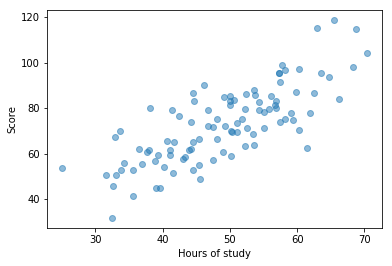

In [13]:
points = genfromtxt("data.csv", delimiter=",")
x = points[ : , 0] # get x hours of study
y = points[ : , 1] # get y exam score

#plt.xkcd()
#plt.figure(figsize=(6,6))
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.show()

In [7]:
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points( initial_b, initial_m, points)))
print("Running...")
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


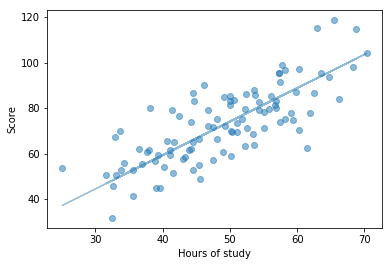

In [14]:
def f(b, m, x):
    return m * x + b

#plt.figure(figsize=(6,6))
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.scatter(x, y, alpha=0.5)
plt.plot(x, f(b,m,x), alpha=0.5)
plt.show()